EDA and Visualizations 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mergin_cleaned_df = pd.read_csv('merged_cleaned_agg_outliers_obs_datasets.csv')
mergin_cleaned_df.head()

,state,longitude,latitude,light_intensity,year,observations,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices
0,bahia,-46.495833,-11.220833,0.380000,2020,3,POINT (-46.4958332253 -11.2208334231),4112093,2101311011101333,2863,4787,58,1,1
1,bahia,-46.495833,-11.216667,0.310000,2020,3,POINT (-46.4958332253 -11.2166667564),4112093,2101311011101333,2863,4787,58,1,1
2,bahia,-46.341667,-11.287500,1.050000,2020,3,POINT (-46.3416665574 -11.2875000903),4112117,2101311100021211,3693,2279,27,3,1
3,bahia,-46.337500,-11.287500,0.683333,2020,3,POINT (-46.3374998907 -11.2875000903),4112118,2101311100021300,634,417,43,8,1
4,bahia,-46.337500,-11.283333,0.440000,2020,3,POINT (-46.3374998907 -11.283333423599998),4112116,2101311100021122,708,418,25,2,1


In [3]:
mergin_cleaned_df['light_intensity'].describe()

count    85860.000000
mean        18.351598
std         16.934265
min          0.123333
25%          4.080000
50%         13.286667
75%         28.300000
max         68.090000
Name: light_intensity, dtype: float64

In [4]:
mergin_cleaned_df['avg_d_kbps'].describe()

count     85860.000000
mean      37734.285034
std       30736.505128
min           1.000000
25%       11968.750000
50%       30110.500000
75%       56740.500000
max      131586.000000
Name: avg_d_kbps, dtype: float64

1.	Heatmap

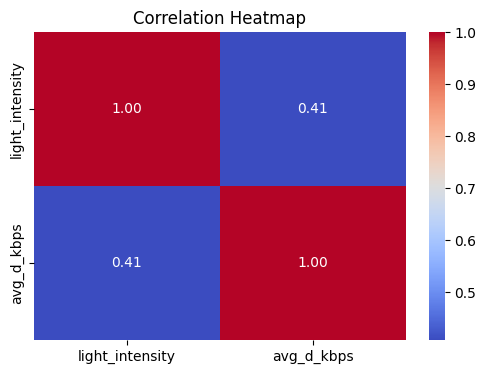

In [5]:
correlation_matrix = mergin_cleaned_df[['light_intensity', 'avg_d_kbps']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

2.	Scatter Plot

Text(0, 0.5, 'light_intensity')

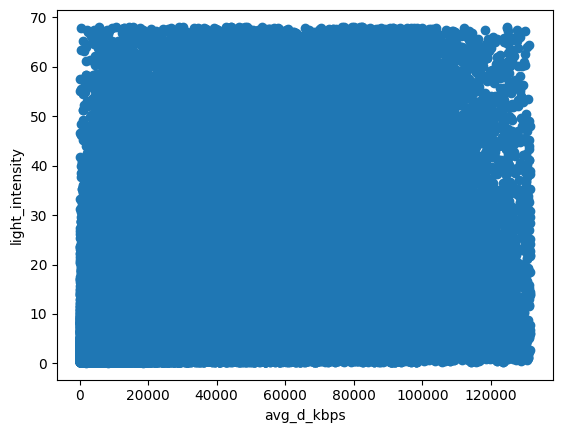

In [6]:
plt.scatter(data = mergin_cleaned_df, x = 'avg_d_kbps', y = 'light_intensity')
plt.xlabel('avg_d_kbps')
plt.ylabel('light_intensity')

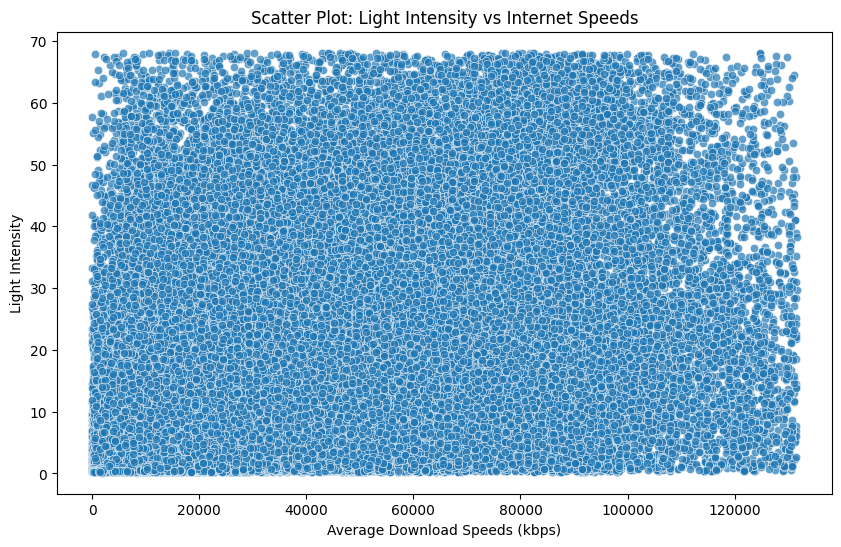

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=mergin_cleaned_df,
    x='avg_d_kbps',
    y='light_intensity',
    alpha=0.7
)
plt.title("Scatter Plot: Light Intensity vs Internet Speeds")
plt.xlabel("Average Download Speeds (kbps)")
plt.ylabel("Light Intensity")
plt.show()

3.	Bar Chart

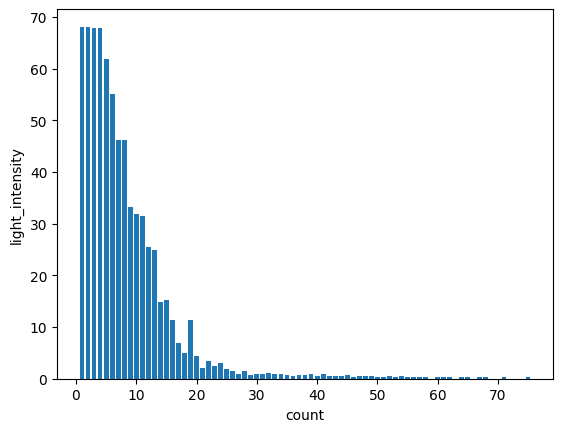

In [8]:
x = mergin_cleaned_df['light_intensity'].value_counts(sort=False)
y = mergin_cleaned_df['light_intensity'].value_counts(sort=False).index

plt.bar(x, y)
plt.xlabel('count')
plt.ylabel('light_intensity')
plt.show()

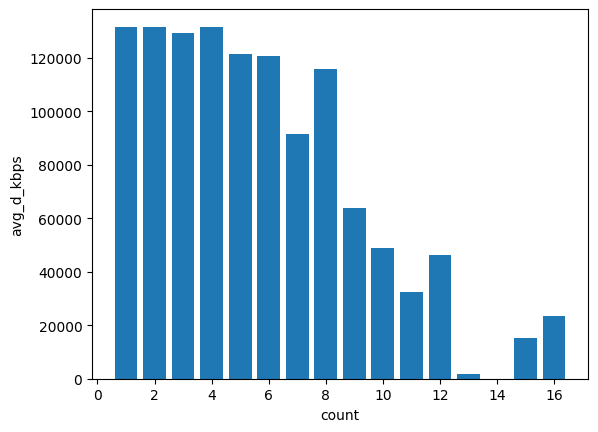

In [9]:
x = mergin_cleaned_df['avg_d_kbps'].value_counts(sort=False)
y = mergin_cleaned_df['avg_d_kbps'].value_counts(sort=False).index

plt.bar(x, y)
plt.xlabel('count')
plt.ylabel('avg_d_kbps')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_17588\1634501671.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


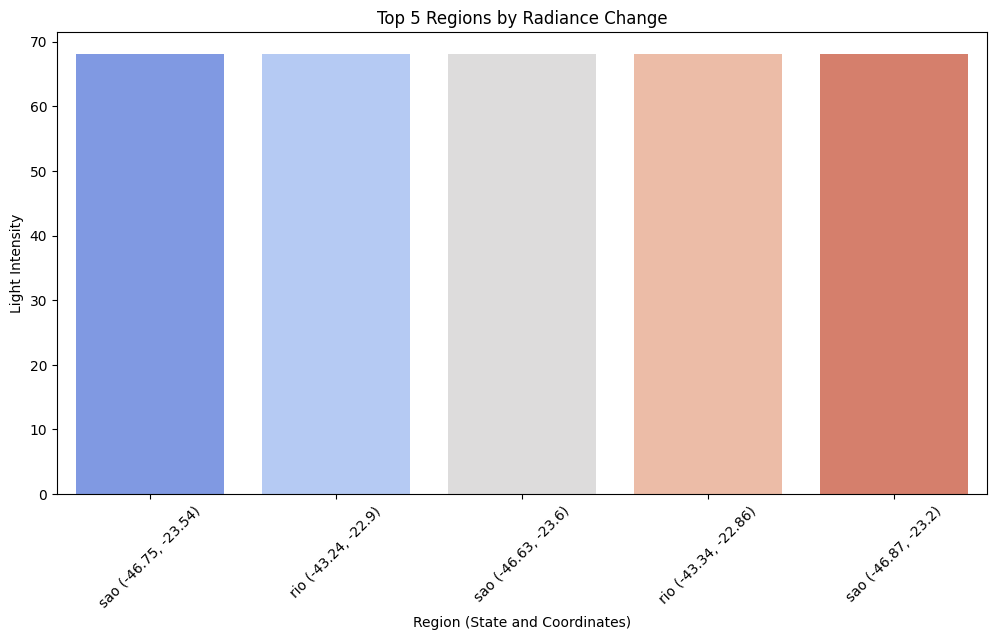

In [25]:
# Extract two decimals for longitude and latitude
mergin_cleaned_df['longitude'] = mergin_cleaned_df['longitude'].round(2)
mergin_cleaned_df['latitude'] = mergin_cleaned_df['latitude'].round(2)

# Find the top 5 regions by light intensity
top_regions = mergin_cleaned_df.nlargest(5, 'light_intensity')

# Create a new column for unique labels combining state and coordinates
top_regions['region_label'] = top_regions['state'] + ' (' + top_regions['longitude'].astype(str) + ', ' + top_regions['latitude'].astype(str) + ')'

# Plot with the new region labels on the x-axis
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_regions,
    x='region_label',  # Use the unique labels for the x-axis
    y='light_intensity',
    palette='coolwarm',
)
plt.title("Top 5 Regions by Radiance Change")
plt.xlabel("Region (State and Coordinates)")
plt.ylabel("Light Intensity")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_17588\3724254912.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


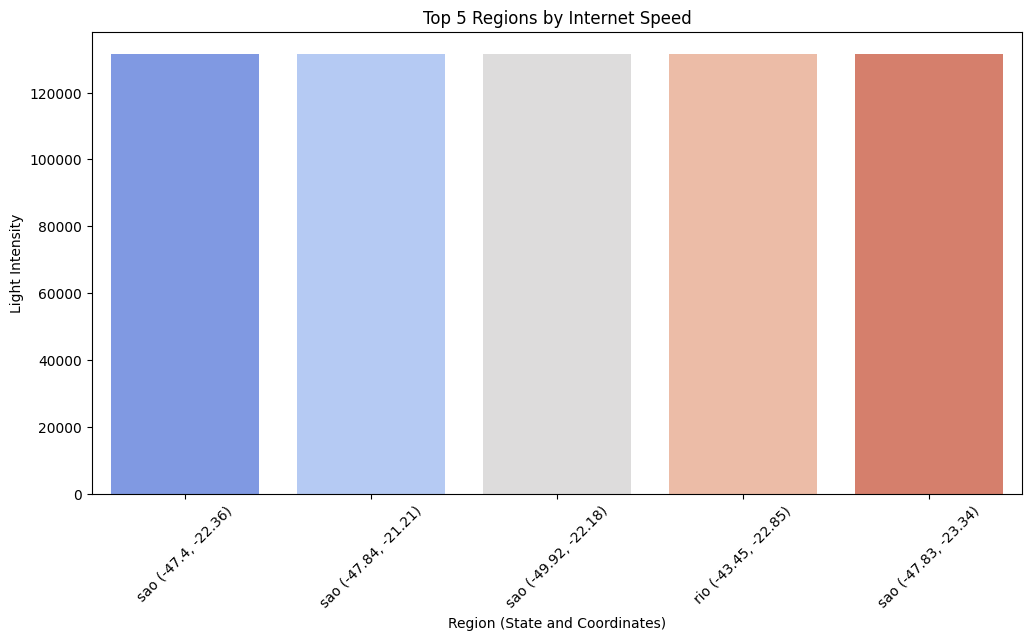

In [30]:
# Extract two decimals for longitude and latitude
mergin_cleaned_df['longitude'] = mergin_cleaned_df['longitude'].round(2)
mergin_cleaned_df['latitude'] = mergin_cleaned_df['latitude'].round(2)

# Find the top 5 regions by light intensity
top_regions = mergin_cleaned_df.nlargest(10, 'avg_d_kbps')

# Create a new column for unique labels combining state and coordinates
top_regions['region_label'] = top_regions['state'] + ' (' + top_regions['longitude'].astype(str) + ', ' + top_regions['latitude'].astype(str) + ')'

# Plot with the new region labels on the x-axis
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_regions,
    x='region_label',  # Use the unique labels for the x-axis
    y='avg_d_kbps',
    palette='coolwarm',
)
plt.title("Top 5 Regions by Internet Speed")
plt.xlabel("Region (State and Coordinates)")
plt.ylabel("Light Intensity")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


4.	Geospatial Overlay

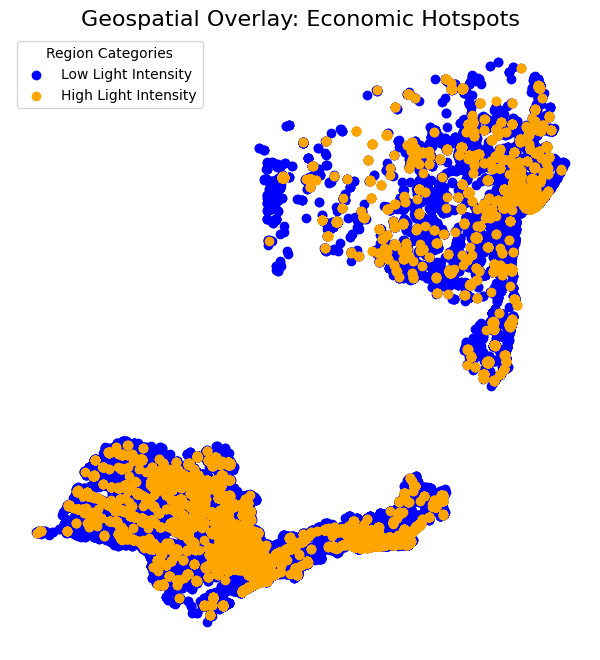

In [14]:
mergin_cleaned_df['geometry'] = gpd.points_from_xy(mergin_cleaned_df['longitude'], mergin_cleaned_df['latitude'])
gdf = gpd.GeoDataFrame(mergin_cleaned_df, geometry='geometry')

def classify_region(row):
    if row['light_intensity'] > 18:
        return 'High Light Intensity'
    else:
        return 'Low Light Intensity'

gdf['region_category'] = gdf.apply(classify_region, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

categories = {
    'Low Light Intensity': 'blue',
    'High Light Intensity': 'orange',
}

for category, color in categories.items():
    subset = gdf[gdf['region_category'] == category]
    subset.plot(ax=ax, color=color, label=category)

plt.legend(title="Region Categories")
plt.title("Geospatial Overlay: Economic Hotspots", fontsize=16)
plt.axis('off')
plt.show()

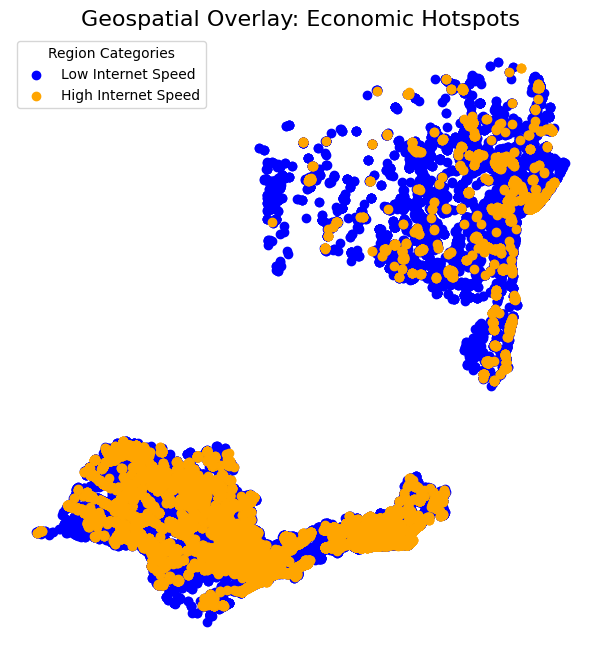

In [15]:
mergin_cleaned_df['geometry'] = gpd.points_from_xy(mergin_cleaned_df['longitude'], mergin_cleaned_df['latitude'])
gdf = gpd.GeoDataFrame(mergin_cleaned_df, geometry='geometry')

def classify_region(row):
    if row['avg_d_kbps'] > 35000:
        return 'High Internet Speed'
    else:
        return 'Low Internet Speed'

gdf['region_category'] = gdf.apply(classify_region, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

categories = {
    'Low Internet Speed': 'blue',
    'High Internet Speed': 'orange',
}

for category, color in categories.items():
    subset = gdf[gdf['region_category'] == category]
    subset.plot(ax=ax, color=color, label=category)

plt.legend(title="Region Categories")
plt.title("Geospatial Overlay: Economic Hotspots", fontsize=16)
plt.axis('off')
plt.show()


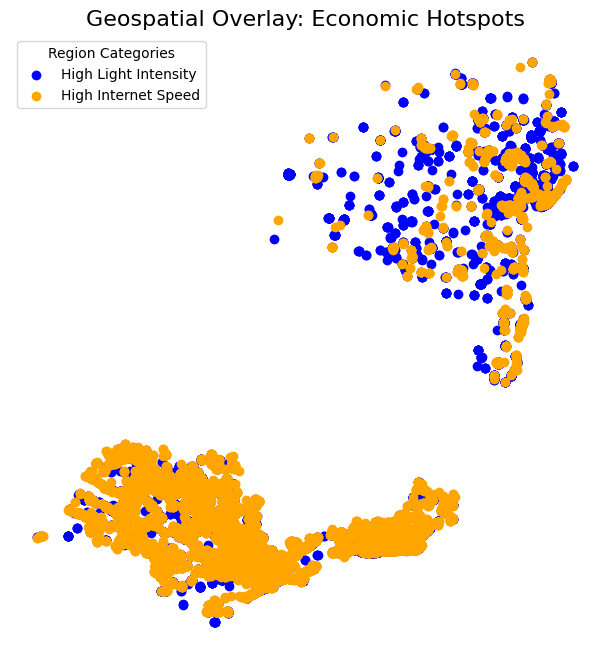

In [16]:
mergin_cleaned_df['geometry'] = gpd.points_from_xy(mergin_cleaned_df['longitude'], mergin_cleaned_df['latitude'])
gdf = gpd.GeoDataFrame(mergin_cleaned_df, geometry='geometry')

def classify_region(row):
    if row['light_intensity'] > 18:
        return 'High Light Intensity'
    elif row['avg_d_kbps'] > 35000:
        return 'High Internet Speed'

gdf['region_category'] = gdf.apply(classify_region, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

categories = {
    'High Light Intensity': 'blue',
    'High Internet Speed': 'orange',
}

for category, color in categories.items():
    subset = gdf[gdf['region_category'] == category]
    subset.plot(ax=ax, color=color, label=category)

plt.legend(title="Region Categories")
plt.title("Geospatial Overlay: Economic Hotspots", fontsize=16)
plt.axis('off')
plt.show()


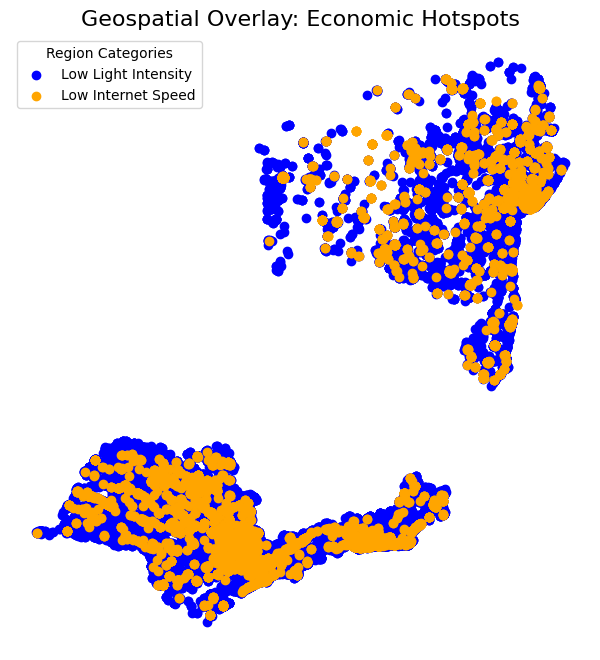

In [17]:
mergin_cleaned_df['geometry'] = gpd.points_from_xy(mergin_cleaned_df['longitude'], mergin_cleaned_df['latitude'])
gdf = gpd.GeoDataFrame(mergin_cleaned_df, geometry='geometry')

def classify_region(row):
    if row['light_intensity'] < 18:
        return 'Low Light Intensity'
    elif row['avg_d_kbps'] < 35000:
        return 'Low Internet Speed'

gdf['region_category'] = gdf.apply(classify_region, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

categories = {
    'Low Light Intensity': 'blue',
    'Low Internet Speed': 'orange',
}

for category, color in categories.items():
    subset = gdf[gdf['region_category'] == category]
    subset.plot(ax=ax, color=color, label=category)

plt.legend(title="Region Categories")
plt.title("Geospatial Overlay: Economic Hotspots", fontsize=16)
plt.axis('off')
plt.show()


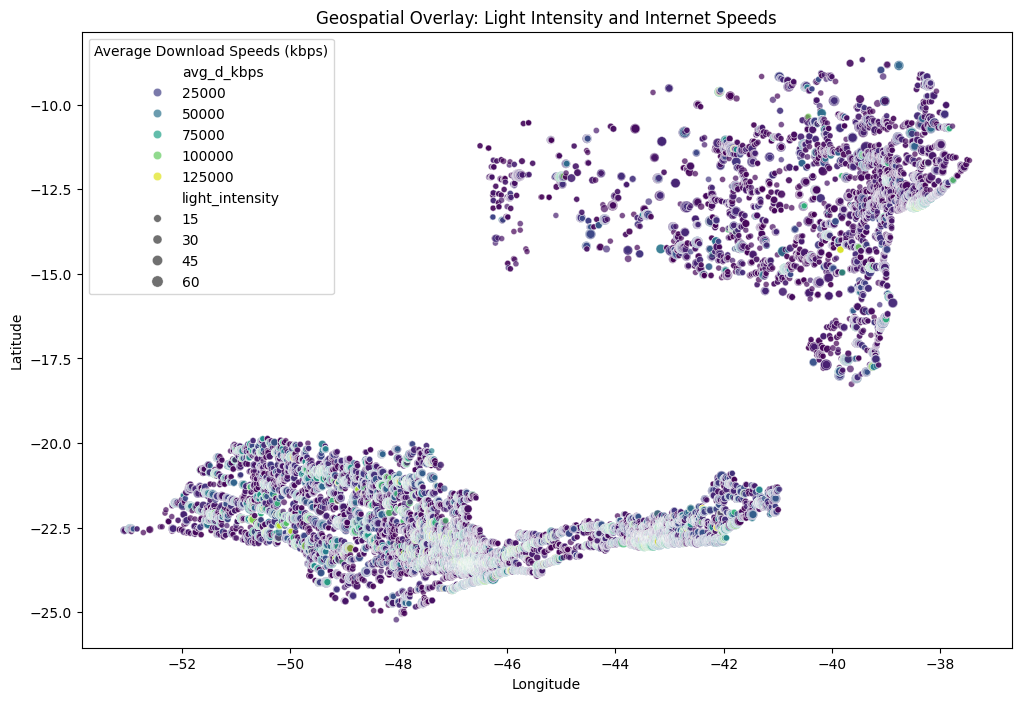

In [18]:
# 2. Geospatial overlay (Scatter plot on longitude and latitude)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=mergin_cleaned_df,
    x='longitude',
    y='latitude',
    size='light_intensity',
    hue='avg_d_kbps',
    palette='viridis',
    alpha=0.7
)
plt.title("Geospatial Overlay: Light Intensity and Internet Speeds")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Average Download Speeds (kbps)")
plt.show()

5.	Line Chart

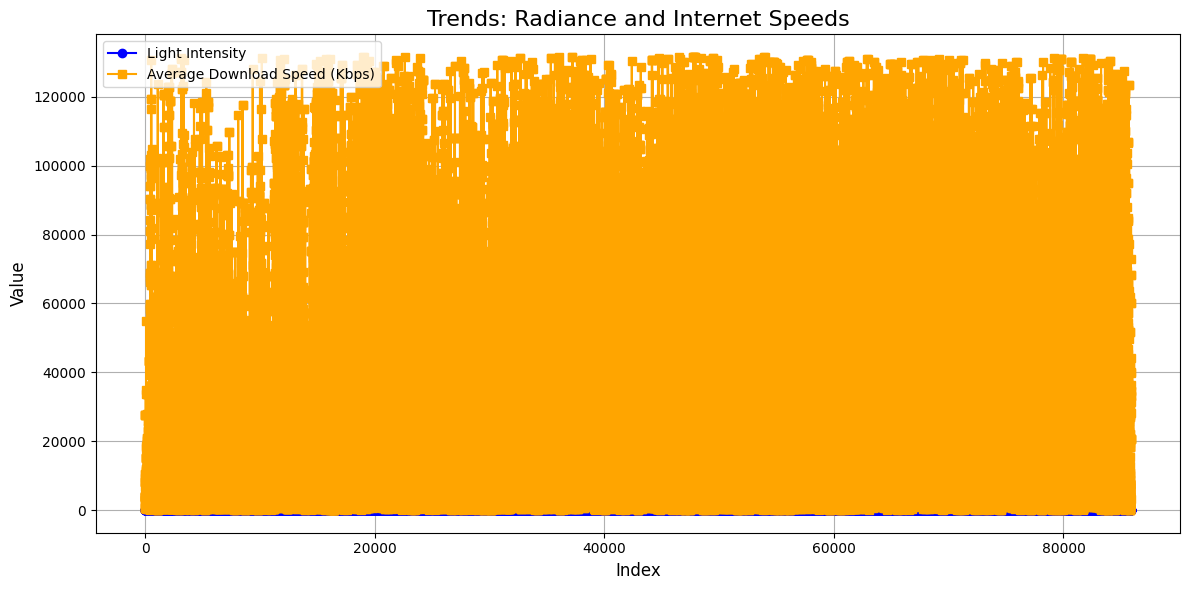

In [19]:
# plt.figure(figsize=(12, 6))

# plt.plot(mergin_cleaned_df.index, mergin_cleaned_df['light_intensity'], label='Light Intensity', color='blue', marker='o')
# plt.plot(mergin_cleaned_df.index, mergin_cleaned_df['avg_d_kbps'], label='Average Download Speed (Kbps)', color='orange', marker='s')

# plt.title("Trends: Radiance and Internet Speeds", fontsize=16)
# plt.xlabel("Index", fontsize=12)
# plt.ylabel("Value", fontsize=12)
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()

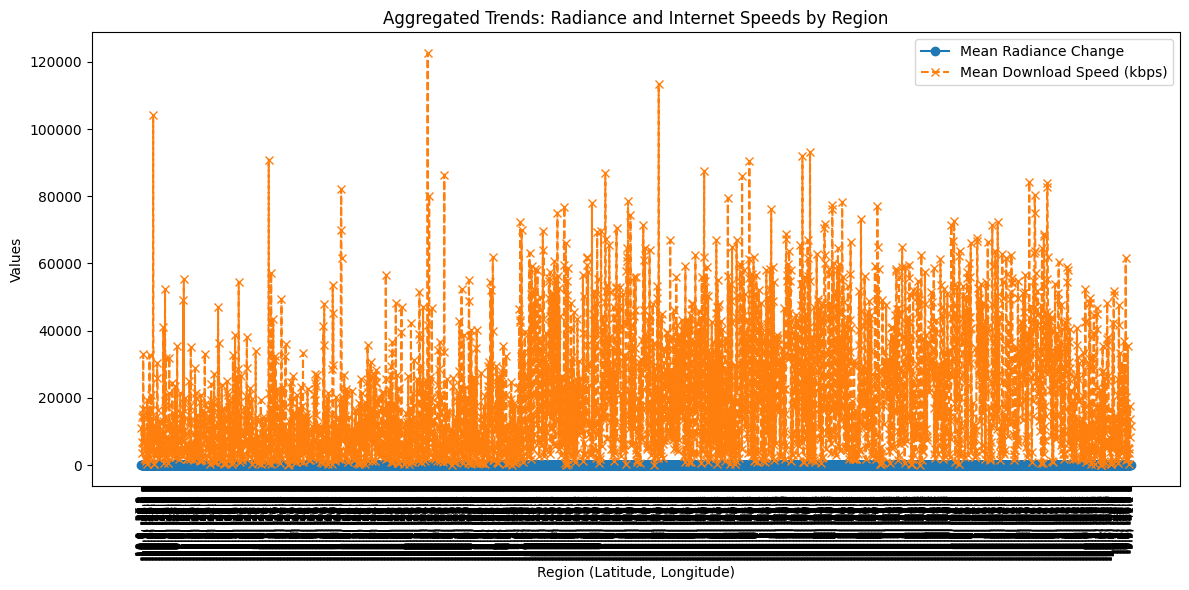

In [22]:
# # 5. Aggregated Trends: Radiance and Internet Speeds by Region
# mergin_cleaned_df['region'] = (
#     mergin_cleaned_df['latitude'].round(1).astype(str) + ", " +
#     mergin_cleaned_df['longitude'].round(1).astype(str)
# )

# aggregated_data = mergin_cleaned_df.groupby(['region']).agg({
#     'light_intensity': 'mean',
#     'avg_d_kbps': 'mean'
# }).reset_index()

# plt.figure(figsize=(12, 6))
# plt.plot(aggregated_data['region'], aggregated_data['light_intensity'], label="Mean Radiance Change", marker="o")
# plt.plot(aggregated_data['region'], aggregated_data['avg_d_kbps'], label="Mean Download Speed (kbps)", linestyle="--", marker="x")
# plt.xticks(rotation=90, fontsize=8)
# plt.title("Aggregated Trends: Radiance and Internet Speeds by Region")
# plt.xlabel("Region (Latitude, Longitude)")
# plt.ylabel("Values")
# plt.legend()
# plt.tight_layout()
# plt.show()

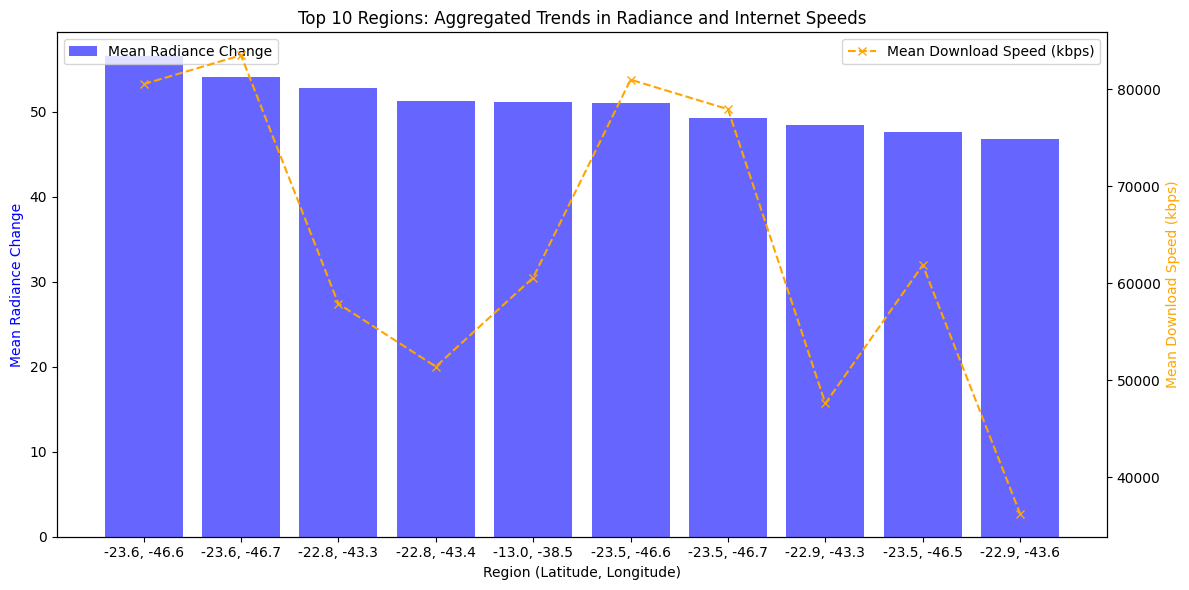

In [31]:
# 5. Improved Aggregated Trends: Top 20 Regions by Radiance and Speeds
mergin_cleaned_df['region'] = (
    mergin_cleaned_df['latitude'].round(1).astype(str) + ", " +
    mergin_cleaned_df['longitude'].round(1).astype(str)
)

aggregated_data = mergin_cleaned_df.groupby(['region']).agg({
    'light_intensity': 'mean',
    'avg_d_kbps': 'mean'
}).reset_index()

top_10_regions = aggregated_data.nlargest(10, 'light_intensity')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.bar(top_10_regions['region'], top_10_regions['light_intensity'], color='b', alpha=0.6, label="Mean Radiance Change")
ax2.plot(top_10_regions['region'], top_10_regions['avg_d_kbps'], color='orange', linestyle="--", marker="x", label="Mean Download Speed (kbps)")

ax1.set_xlabel("Region (Latitude, Longitude)", fontsize=10)
ax1.set_ylabel("Mean Radiance Change", color='b', fontsize=10)
ax2.set_ylabel("Mean Download Speed (kbps)", color='orange', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.title("Top 10 Regions: Aggregated Trends in Radiance and Internet Speeds")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()